# Take home challange 

## Part-1: Exploratory Data Analysis 

### Import necessary Python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import dataset

In [2]:
logins = pd.read_json('logins.json')

### Exploratory Data Analysis on the dataset

In [3]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
logins.shape

(93142, 1)

In [5]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


### Logins per 15 minutes

In [6]:
logins_15mins = logins.set_index('login_time').resample('15min').size()
logins_15mins[:10]

login_time
1970-01-01 20:00:00    2
1970-01-01 20:15:00    6
1970-01-01 20:30:00    9
1970-01-01 20:45:00    7
1970-01-01 21:00:00    1
1970-01-01 21:15:00    4
1970-01-01 21:30:00    0
1970-01-01 21:45:00    4
1970-01-01 22:00:00    9
1970-01-01 22:15:00    8
Freq: 15T, dtype: int64

In [7]:
type(logins_15mins)

pandas.core.series.Series

In [8]:
# Convert the series to a dataframe for further exploration
logins_15mins_dataframe = pd.DataFrame(logins_15mins, columns = ['counts'])

In [9]:
logins_15mins_dataframe.head(10)

,counts
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
1970-01-01 21:15:00,4
1970-01-01 21:30:00,0
1970-01-01 21:45:00,4
1970-01-01 22:00:00,9


In [10]:
logins_15mins_dataframe.describe()

,counts
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


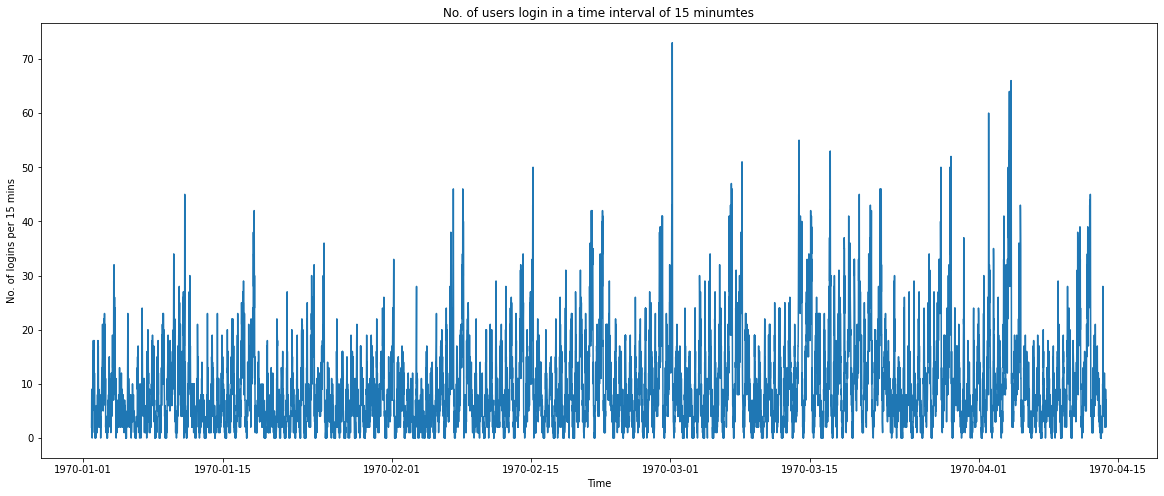

In [11]:
# Plot the number of logins per every 15 minutes
plt.figure(figsize = (20, 8))
plt.plot(logins_15mins_dataframe.index, logins_15mins_dataframe.counts)
plt.title('No. of users login in a time interval of 15 minumtes')
plt.xlabel('Time')
plt.ylabel('No. of logins per 15 mins')
plt.show()

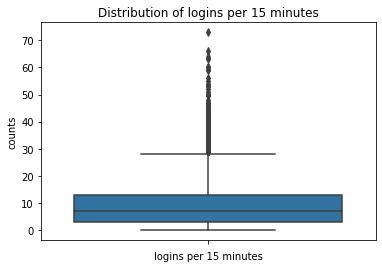

In [12]:
# Plot boxplot
sns.boxplot(y = logins_15mins_dataframe.counts, data = logins_15mins_dataframe)
plt.title("Distribution of logins per 15 minutes")
plt.xlabel('logins per 15 minutes')
plt.ylabel('counts')
plt.show()

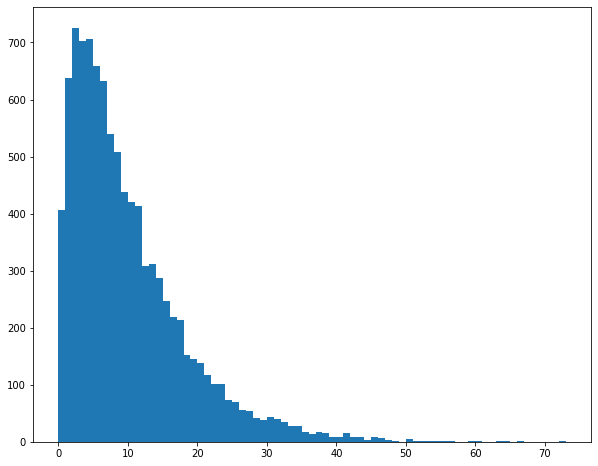

In [13]:
plt.figure(figsize = (10,8))
plt.hist(x = logins_15mins_dataframe.counts, bins = 73)
plt.show()

In [14]:
type(logins_15mins_dataframe.counts)

pandas.core.series.Series

In [15]:
a = np.array(logins_15mins_dataframe.counts)
np.percentile(a, 2.5)

0.0

In [16]:
np.percentile(a, 97.5)

32.0

### logins per day

In [17]:
logins_per_day = logins_15mins.resample('D').size()
logins_per_day

login_time
1970-01-01    16
1970-01-02    96
1970-01-03    96
1970-01-04    96
1970-01-05    96
              ..
1970-04-09    96
1970-04-10    96
1970-04-11    96
1970-04-12    96
1970-04-13    76
Freq: D, Length: 103, dtype: int64

In [18]:
type(logins_per_day)

pandas.core.series.Series

In [19]:
# Convert the series into a dataframe
logins_per_day_dataframe = pd.DataFrame(logins_per_day, columns = ['counts'])
logins_per_day_dataframe

,counts
login_time,
1970-01-01,16
1970-01-02,96
1970-01-03,96
1970-01-04,96
1970-01-05,96
...,...
1970-04-09,96
1970-04-10,96
1970-04-11,96


In [20]:
logins_per_day_dataframe.counts.describe()

count    103.000000
mean      95.029126
std        8.106468
min       16.000000
25%       96.000000
50%       96.000000
75%       96.000000
max       96.000000
Name: counts, dtype: float64

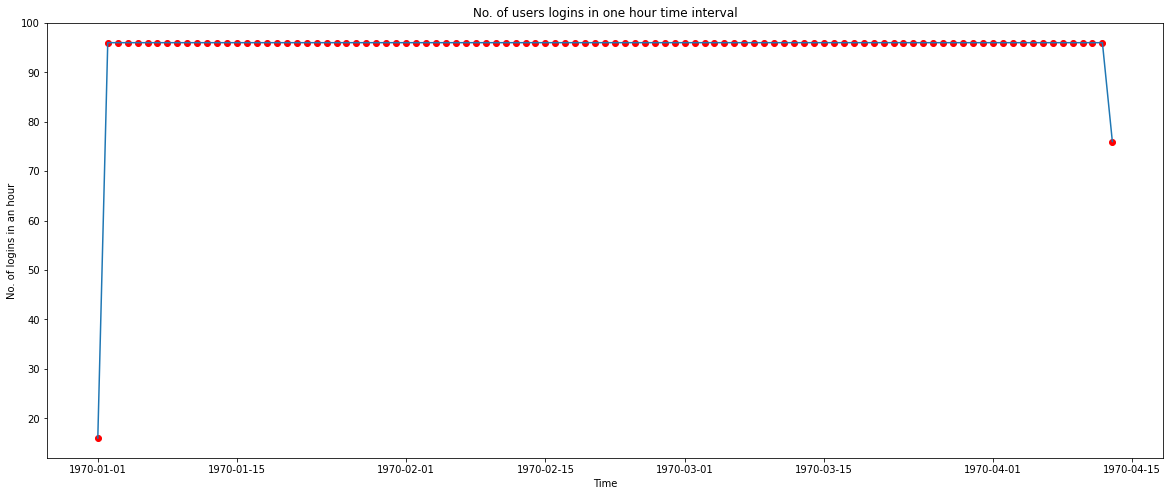

In [21]:
# Show the distribution of the no.of logins per day
plt.figure(figsize = (20, 8))
plt.scatter(logins_per_day_dataframe.index, logins_per_day_dataframe.counts, color = 'r')
plt.plot(logins_per_day_dataframe.index, logins_per_day_dataframe.counts)
plt.title("No. of users logins in one hour time interval")
plt.xlabel('Time')
plt.ylabel('No. of logins in an hour')
plt.show()

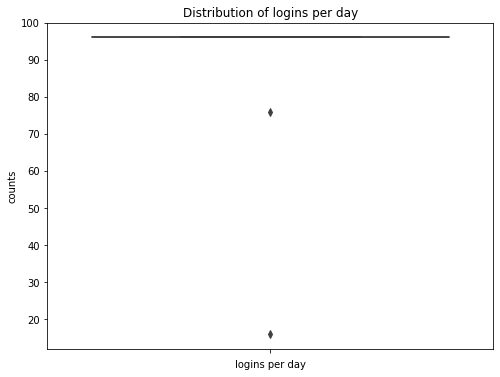

In [22]:
# plot a box plot to show the above distribution
plt.figure(figsize = (8, 6))
sns.boxplot(y = logins_per_day_dataframe.counts, data = logins_per_day_dataframe)
plt.title("Distribution of logins per day")
plt.xlabel('logins per day')
plt.ylabel('counts')
plt.show()

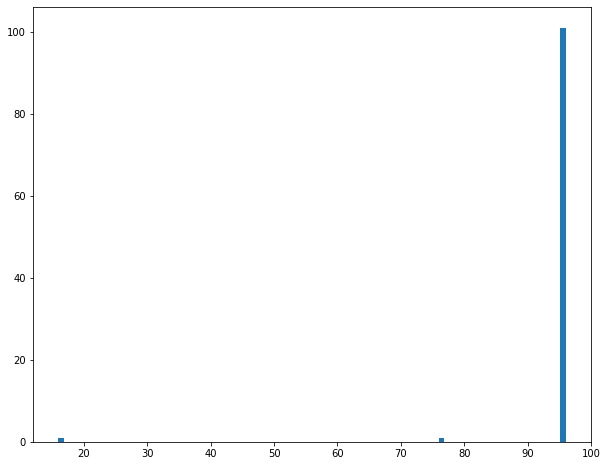

In [23]:
plt.figure(figsize = (10,8))
plt.hist(x =logins_per_day_dataframe.counts, bins = 96)
plt.show()

In [24]:
b = np.array(logins_per_day_dataframe.counts)
np.percentile(b, 2.5)

96.0

In [25]:
np.percentile(b, 97.5)

96.0

# Summary:

**The no. of logins vary every 15 minutes, it can be zero or reach upto 73, with an average logins of 10. The 95% confidence interval of the no. of logins lies between 0-32.**<br><br>

**In the case of no. of logins per day, the counts remains constant for everyday except the first and last day. The no. of logins per day is constant at 96.**